In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

#Step1: Load and Process the Data
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

'''
# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()
'''
print('an example of a data point with label', Y_train[20], 'before to_categorical ...')

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)


#CREAZIONE DELLA DEEP NEURAL NETWORK####################################
from keras.models import Sequential
from keras.layers import Dense, Dropout
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    #perché voglio che tutto sia trasformato in probabilità
    return model

print('Model architecture created successfully!')
#########################################################################

#PREPARAZIONE DEL MODELLO
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [3]:
# training parameters
batch_size = 32
epochs = 5   #potrebbero essere poche, possiamo modificarle noi

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 234us/step - loss: 0.2778 - accuracy: 0.9180 - val_loss: 0.1249 - val_accuracy: 0.9607
Epoch 2/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.1430 - accuracy: 0.9599 - val_loss: 0.0950 - val_accuracy: 0.9699
Epoch 3/5
60000/60000 [==============================] - 13s 214us/step - loss: 0.1114 - accuracy: 0.9686 - val_loss: 0.0832 - val_accuracy: 0.9741
Epoch 4/5
60000/60000 [==============================] - 13s 214us/step - loss: 0.0946 - accuracy: 0.9739 - val_loss: 0.0757 - val_accuracy: 0.9756
Epoch 5/5
60000/60000 [==============================] - 13s 218us/step - loss: 0.0799 - accuracy: 0.9775 - val_loss: 0.0691 - val_accuracy: 0.9787


10000/10000 [==============================] - 1s 54us/step

Test loss: 0.06905304787573405
Test accuracy: 0.9786999821662903


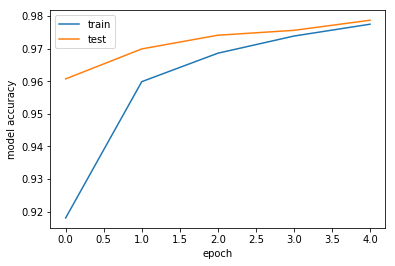

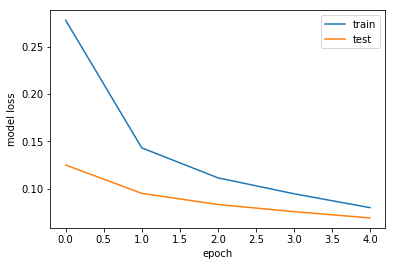

In [4]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

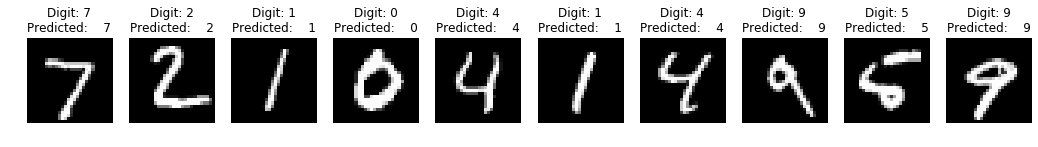

In [5]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(18, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

OPTIMIZER = SGD

Test loss: 0.1539617390729487

Test accuracy: 0.9535999894142151

OPTIMIZER = ADAM

Test loss: 0.07449029765961604

Test accuracy: 0.9790999889373779

OPTIMIZER = RMSprop

Test loss: 0.1459773301573462

Test accuracy: 0.9722999930381775

OPTIMIZER = ADAGRAD

Test loss: 0.07348936868654564

Test accuracy: 0.9765999913215637

Osservo che i risultati più soddisfacenti si ottengono utilizzando come optimizer Adagrad o Adam.



### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, 
`MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense`
 layer and `soft-max` in the end. I have merged step 2 and 3 in the following 
 definition of `create_CNN()` that **<span style="color:red">you should 
 complete</span>**:

In [6]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [7]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))   
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    # add a dense all-to-all relu layer
    model.add(Dense(128, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    model.add(Dense(40, activation='relu'))
    # apply dropout with rate 0.5
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

Train my DCNN and evaluate its performance proceeding exactly as 12.1:

In [8]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 598us/step - loss: 0.2341 - accuracy: 0.9274 - val_loss: 0.0617 - val_accuracy: 0.9807
Epoch 2/5
60000/60000 [==============================] - 36s 608us/step - loss: 0.0819 - accuracy: 0.9760 - val_loss: 0.0401 - val_accuracy: 0.9875
Epoch 3/5
60000/60000 [==============================] - 37s 616us/step - loss: 0.0618 - accuracy: 0.9821 - val_loss: 0.0342 - val_accuracy: 0.9885
Epoch 4/5
60000/60000 [==============================] - 35s 584us/step - loss: 0.0512 - accuracy: 0.9850 - val_loss: 0.0375 - val_accuracy: 0.9888
Epoch 5/5
10000/10000 [==============================] - 2s 198us/step

Test loss: 0.03624161706319355
Test accuracy: 0.9891999959945679


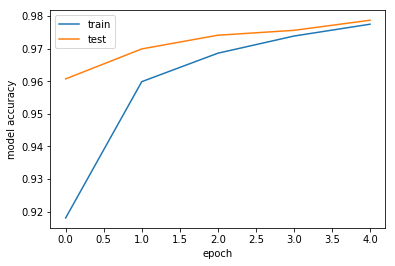

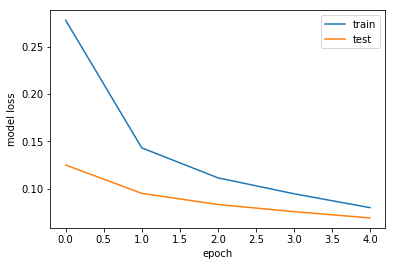

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best');plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best');plt.show()

Ho costruito la rete nel seguente modo:
Il primo layer è di tipo convolution, questo perchè mi aspetto che 
i pixels siano legati con quelli vicini e la convoluzione permette di preservare le relazioni tra le diverse parti dell'immagine riducendone la complessità. Ho costruito 10 filtri di 5x5.
Come secondo layer ho inserito un pooling layer (2x2), che permette di ridurre la dimensionalità e quindi il numero di parametri. 
Ho ripetuto due volte tale operazione scegliendo come activation per i Convolution la funzione Relu. 

Con le precedenti operazioni - inserite prima del Flatten - la matrice ha subito le seguenti modifiche: $28 \times 28 \times 1 \rightarrow 24 \times 24 \times 10 \rightarrow 12 \times 12 \times 10 \rightarrow 8 \times 8 \times 30 \rightarrow 4\times 4 \times 30  $

Poi ho utilizzato *Flatten* e creato un fully connected layer inserendo  un funzione *Dropout* che inibisce alcuni neuroni in modo da aiutare il problema dell'overfitting. L'ultimo layer utilizza una funzione di attivazione di tipo soft-max che per ogni neurone esegue una sorta di normalizzazione producendo una probabilità con valori compresi tra $0$ e $1$.

I risultati delle prestazioni della rete sono soddisfacenti:

Test loss: 0.03531977350279131

Test accuracy: 0.9897000193595886

Ecco la prediction:


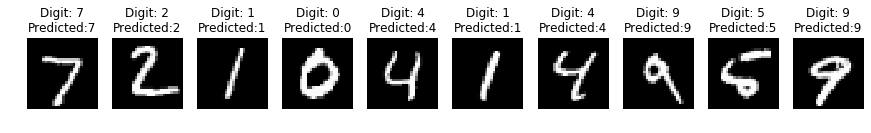

In [10]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off');
    
plt.show()

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

<Figure size 1080x1080 with 0 Axes>

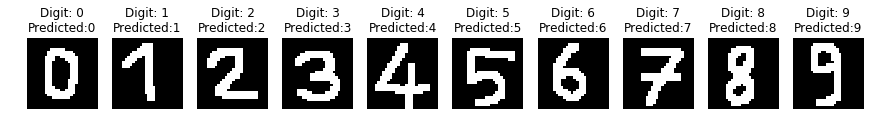

In [14]:
from PIL import Image
import os

data = np.zeros((10,28, 28))
plt.figure(figsize=(15, 15)) 

for k in range (10):
    digit_filename = "Digits"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    for j in range(ydim):
        for i in range(xdim):
            data[k,i,j]=pix[j,i]
    
    data[k,:,:] /= 255


if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


pred_0 = model_CNN.predict(data)

data = data.reshape(data.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(i, np.argmax(pred_0[i])))    
    plt.axis('off')
    
plt.show()

La rete neurale riesce a riconoscere i numeri da me scritti.